# Introduction and Objectives

The objective of this practice is to work with data from the EGRET (Energetic Gamma Ray Experiment Telescope) and BATSE (Burst and Transient Source Experiment) instruments, both of which were part of NASA's Compton Gamma Ray Observatory (CGRO).

Both instruments are used to study high-energy events, especially gamma rays. However, each operates within a different energy range. The BATSE instrument records GRBs (Gamma-Ray Bursts), while EGRET records supernova remnants, pulsars, solar flares, AGNs, among others.


- The four main sources that emit gamma rays are:
    
    - Supernova explosions and remnants: when a massive star explodes as a supernova, gamma rays can be emitted. The remnants of the explosion, such as nebulae, can also continue emitting radiation due to particles accelerated in their magnetic fields.
 
    - Pulsars and neutron stars: pulsars emit beams of radiation, including gamma rays. However, the emission from neutron stars tends to be weaker; the radiation we receive from them is less intense.
 
    - Black holes and active galactic nuclei (AGNs): supermassive black holes at the centers of galaxies can emit gamma rays when material falls into them. Blazars are a particular type of AGN in which the radiation jet is pointed directly at Earth.
 
    - Gamma-ray bursts (GRBs): these are the most intense sources of gamma rays known. They are sudden explosions that last for a short time, at most, a few minutes. They are associated with the death of very massive stars or the merger of neutron stars.
 
The main goal of the practice is to work with the catalogs from the two instruments, EGRET and BATSE, and represent the events using a Mollweide projection. In the case of EGRET, the goal is to differentiate the types of gamma-ray events that occur and distinguish them. On the other hand, for BATSE, the events are represented by distinguishing the time at which they occurred.

# Libraries

We start by importing the Python libraries needed to work; the [Vizier](https://astroquery.readthedocs.io/en/latest/vizier/vizier.html) class from the [astroquery](https://astroquery.readthedocs.io/en/latest/) library allows access to astronomical databases, [pandas](https://pandas.pydata.org/docs/user_guide/index.html) is used for data processing and analysis, [numpy](https://numpy.org/doc/2.2/user/index.html#user) allows performing numerical calculations, [matplotlib](https://matplotlib.org/stable/users/index.html) is used to [plot graphs](https://matplotlib.org/stable/gallery/), the [SkyCoord](https://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) class from the [astropy](https://docs.astropy.org/en/stable/index_user_docs.html) and the [units](https://docs.astropy.org/en/stable/units/index.html) module, also from astropy, which allows physical units to be assigned, [MWSkyMap](https://milkyway-plot.readthedocs.io/en/latest/matplotlib_skymap.html) from the [mw_plot](https://milkyway-plot.readthedocs.io/en/latest/basics.html) library allows generating sky maps centered on a point in the Milky Way, and finally [connect_to_app](https://pywwt.readthedocs.io/en/stable/api/pywwt.jupyter.connect_to_app.html) from [pywwt](https://pywwt.readthedocs.io/en/stable/index.html), which allows us to establish a connection with WorldWide Telescope.

In [1]:
from astroquery.vizier import Vizier
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from mw_plot import MWSkyMap
from pywwt.jupyter import connect_to_app

# EGRET

## Loading the catalog

Vizier is a class in which we can assign parameters such as the number of rows, as will be seen below. This class enables us to perform searches in the catalog. First, we will perform a search of the EGRET catalog.

In [2]:
vizier = Vizier()
catalog_list = vizier.find_catalogs('egret')
for k, v in catalog_list.items():
    print(k, ":", v.description)

I/196 : Hipparcos Input Catalogue, Version 2 (Turon+ 1993)
I/197A : Tycho Input Catalogue, Revised version (Egret+ 1992)
I/207 : Preliminary list from Tycho observations (TIC data) (Halbwachs+ 1994)
II/228A : DENIS Catalogue toward Magellanic Clouds (DCMC) (Cioni+ 2000)
II/240 : The DENIS database first release (Epchtein+, 1999)
II/243 : The ISOGAL Point Source Catalogue - IGPSC (Omont+ 2003)
III/67A : Catalogue of Be stars (Jaschek+, 1982)
III/68 : List of Early-Type Chemically Peculiar Stars (Egret+ 1981)
III/83 : IUE Low-Dispersion Reference Atlas I, Normal Stars (Heck+ 1984)
IV/33 : Master Catalogue towards the Magellanic Clouds (MC2) (Delmotte+ 2002)
V/14 : Estimated astrophysical parameters from uvby (Philip+ 1980)
V/17A : A list of Supergiant Stars (Egret 1980)
J/ApJ/481/95 : Radio identification of EGRET sources (Mattox+ 1997)
J/ApJ/657/706 : EGRET blazar gamma-ray spectrum (Nandikotkur+, 2007)
J/ApJ/671/1355 : EGRET blazars in VIPS (Taylor+, 2007)
J/ApJS/101/259 : The second E

What we have done is search the VizieR database for catalogs that contains the word "egret". As mentioned, we adjusted the "ROW_LIMIT" parameter to retrieve all the rows from the table.

We selected the catalog with the identifier "J/ApJS/123/79", which corresponds to the Third EGRET catalog (3EG) (Hartman+, 1999). The result is a list of tables, that is, each element of the variable "egret_" is a table. 

In [3]:
vizier.ROW_LIMIT = -1
egret_ = vizier.get_catalogs("J/ApJS/123/79")
egret_

TableList with 5 tables:
	'0:J/ApJS/123/79/3eg' with 10 column(s) and 271 row(s) 
	'1:J/ApJS/123/79/fluxes' with 9 column(s) and 5245 row(s) 
	'2:J/ApJS/123/79/table1' with 7 column(s) and 169 row(s) 
	'3:J/ApJS/123/79/notes' with 2 column(s) and 112 row(s) 
	'4:J/ApJS/123/79/refs' with 2 column(s) and 27 row(s) 

## Data processing

We work with the first of the tables. We use pandas to convert the table into this format and work with it accordingly.

In [4]:
df_egret = egret_[0].to_pandas()
df_egret

3EG     RAJ2000    DEJ2000  theta95          F   e_F  Sp-Index ID  \
0    J0010+7309    2.560000  73.169998     0.24  42.299999   5.5      1.85      
1    J0038-0949    9.740000  -9.820000     0.59  12.000000   3.7      2.70      
2    J0118+0248   19.600000   2.810000     1.16  20.299999   5.8      2.63  a   
3    J0130-1758   22.700001 -17.969999     0.97  11.600000   3.0      2.50  a   
4    J0159-3603   29.840000 -36.060001     0.79   9.800000   2.8      2.89      
..          ...         ...        ...      ...        ...   ...       ... ..   
266  J2314+4426  348.700012  44.439999     0.78  40.400002  10.0      2.34      
267  J2321-0328  350.410004  -3.480000     1.24  38.200001  10.1       NaN  A   
268  J2352+3752  358.100006  37.880001     0.94  37.500000  10.3      2.47  a   
269  J2358+4604  359.570007  46.070000     0.68  14.300000   3.7      2.38  A   
270  J2359+2041  359.989990  20.700001     1.04  16.000000   4.7      2.09  A   

     Note      r_ID  
0    @,em       1,2  
1                    
2       C         1  
3                 1  
4                 1  
..    ...       ...  
266    em            
267        10,11,20  
268  em,C     10,20  
269  em,C            
270     C     1,3,4  

[271 rows x 10 columns]

At [this link](https://cdsarc.cds.unistra.fr/viz-bin/cat/J/ApJS/123/79#/description), we can see the information about the table we are working with. Additionally, using ".columns" we get the column headers.

In [5]:
df_egret.columns

Index(['3EG', 'RAJ2000', 'DEJ2000', 'theta95', 'F', 'e_F', 'Sp-Index', 'ID',
       'Note', 'r_ID'],
      dtype='object')

Now, we analyze "ID" column, for this, we use ".value_counts()", which shows how many elements there are for each of the recorded sources. We see that there are 170 unidentified sources.

On the other hand, the remaining source types are as follows: A and a are AGNs (active galactic nuclei), P are pulsars (pulsed gamma radiation), S are solar flares, and G are galaxies from the Large Magellanic Cloud (LMC).

In [6]:
df_egret['ID'].value_counts()

ID
     170
A     67
a     27
P      5
S      1
G      1
Name: count, dtype: int64

We assign the identifier 'U' to the unknown sources.

In [7]:
df_egret.loc[df_egret['ID'] == '', 'ID'] = 'U'
df_egret['ID'].value_counts()

ID
U    170
A     67
a     27
P      5
S      1
G      1
Name: count, dtype: int64

We use SkyCoord to convert the RA and DEC coordinates from the J2000 cordinate system to coordinates in the ICRS (International Celestial Reference System).

In [8]:
df_egretCoords = SkyCoord(
    df_egret['RAJ2000'], df_egret['DEJ2000'],
    unit=(u.degree, u.degree), frame='icrs'
)

We display the first 10 coordinates we have obtained to observe their structure.

In [9]:
df_egretCoords[:10]

<SkyCoord (ICRS): (ra, dec) in deg
    [( 2.56,  73.17), ( 9.74,  -9.82), (19.6 ,   2.81), (22.7 , -17.97),
     (29.84, -36.06), (31.11,  14.97), (32.58, -50.93), (34.  ,  11.38),
     (35.7 ,  42.9 ), (37.32,  61.86)]>

## Visualization of the Mollweide Projection

### Mollweide projection example

Next, we plot an arbitrary point on the Mollweide projection, which is a spherical projection used to represent the Earth's sphere.

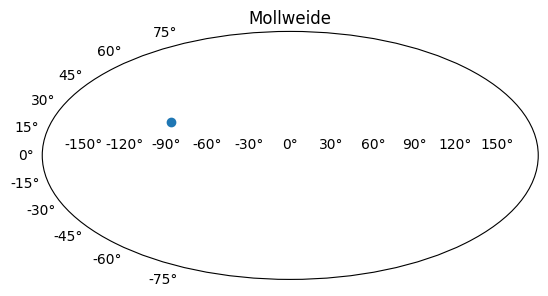

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="mollweide")
plt.title("Mollweide")
plt.scatter(np.radians(-90), np.radians(20))
plt.grid(False)

### Representation of the sources

We represent the sources from the table using their coordinates and the Mollweide projection. The galactic longitude must be constrained between -180 and 180 degrees, and a negative sign is added because the projection occurs on the "opposite side" from the observer is, and that is the projection we are interested in. To represent the sources, we also need to work with the galactic latitude.

/tmp/ipykernel_4135/1088447161.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=1)


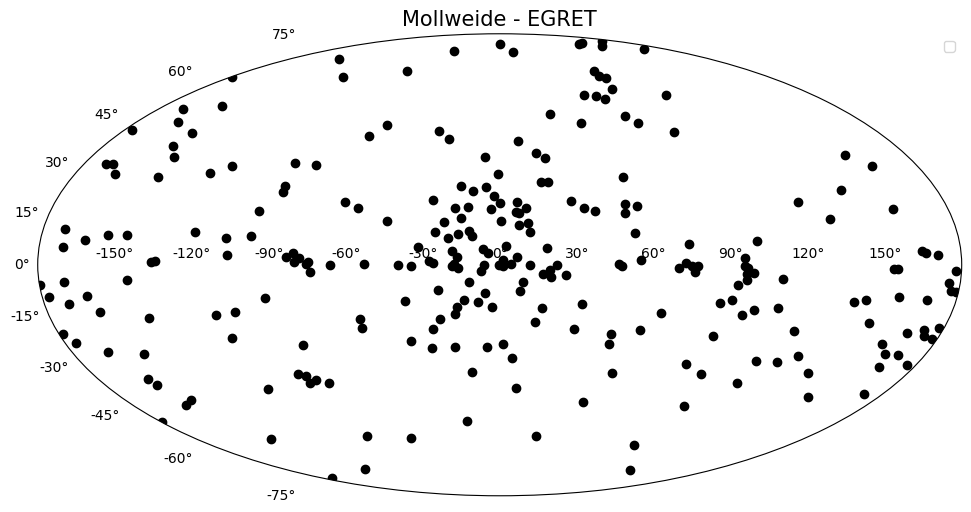

In [11]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111, projection="mollweide")
plt.title("Mollweide - EGRET", fontsize=15)
ax.scatter(-df_egretCoords.galactic.l.wrap_at(180.*u.degree).radian,
           df_egretCoords.galactic.b.radian, c="black", marker='o')
plt.grid(False)
ax.legend(loc=1)

We define the coordinates for each of the source type and we will represent each type of source in a different color.

In [12]:
coord_u = df_egretCoords[df_egret['ID']=='U']
coord_a = df_egretCoords[(df_egret['ID']=='A') | (df_egret['ID']=='a')]
coord_s = df_egretCoords[df_egret['ID']=='S']
coord_p = df_egretCoords[df_egret['ID']=='P']
coord_g = df_egretCoords[df_egret['ID']=='G']

coords = [coord_u, coord_a, coord_s, coord_p, coord_g]
colors = ['brown', 'yellow', 'white', 'green', 'black']
type_sources = ['Unknown', 'AGN', 'Solar flare', 'Pulsar', 'Galaxy (LMC)']

We use the 'gamma' background, which represents a map of gamma-ray emission in the sky. This allows us to see how the different sources are distributed across known structures in the sky, such as the galactic plane. 

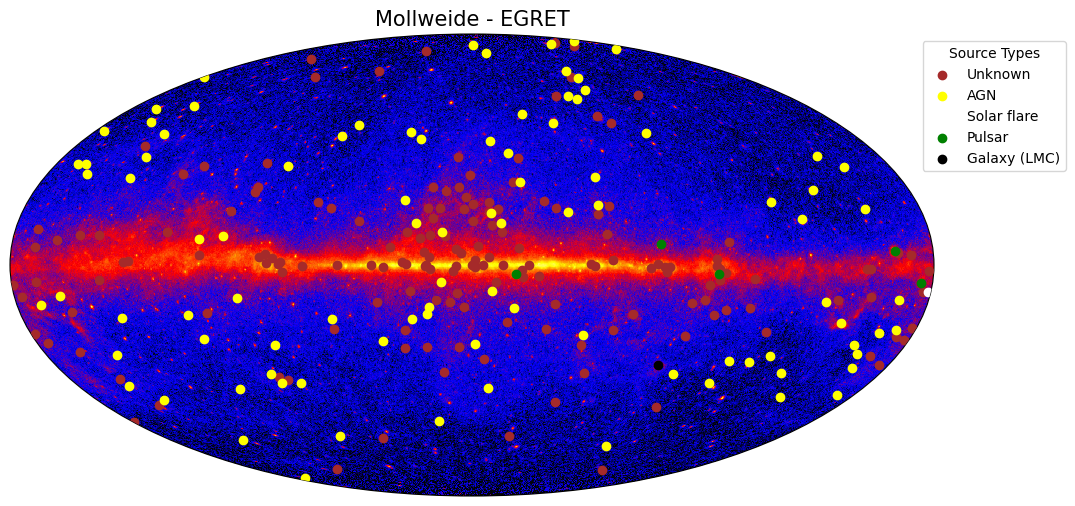

In [13]:
fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot(111, projection="mollweide")
plt.title("Mollweide - EGRET", fontsize=15)

for coord, color, label in zip(coords, colors, type_sources):
    ax.scatter(
        -coord.galactic.l.wrap_at(180.*u.degree).radian,
        coord.galactic.b.radian,
        c=color, marker='o',
        label=label, zorder=100
    )

mw1 = MWSkyMap(projection="mollweide", background="gamma")
mw1.transform(ax)

plt.grid(False)
ax.legend(loc=1, bbox_to_anchor=(1.15, 1), title="Source Types")

# WorldWide Telescope - EGRET

We use pywwt, a Python library that allows us to use WorldWide Telescope (WWT) within Jupyter.

In [14]:
wwt = await connect_to_app().becomes_ready()

In [15]:
wwt.layer_controls

In [16]:
egret_layer = wwt.layers.add_table_layer(table=egret_[0], frame='Sky',
    lon_att='RAJ2000', lat_att='DEJ2000')

This is the result we obtain in the case of EGRET to visualize the sources.

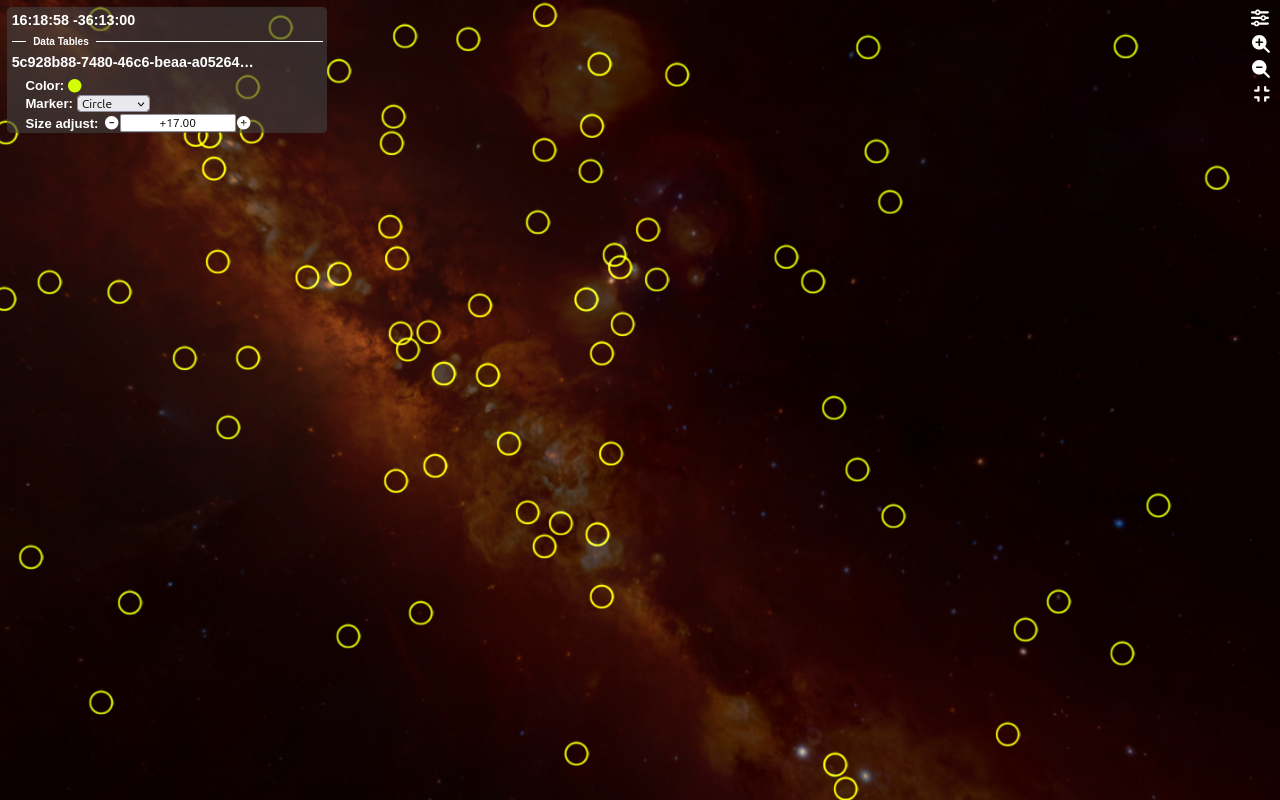

In [17]:
from IPython.display import Image
Image(filename='EGRETsources.png')

One possible improvement would be to include specific colors for each of the gamma-ray source types in the legend, similar to how it was done when representing the sources in the Mollweide projection.

In [18]:
from astropy.table import Table

wwt = await connect_to_app().becomes_ready()
wwt.layer_controls

stype_and_colors = {'P': 'red', 'A': 'yellow', 'S': 'green', 'G': 'blue', 'U': 'white'}

for stype, color in stype_and_colors.items():
    df_sub = df_egret[df_egret['ID'] == stype]

    table_egret = Table.from_pandas(df_sub)

    egret_layer = wwt.layers.add_table_layer(table=table_egret, frame='Sky',
        lon_att='RAJ2000', lat_att='DEJ2000')

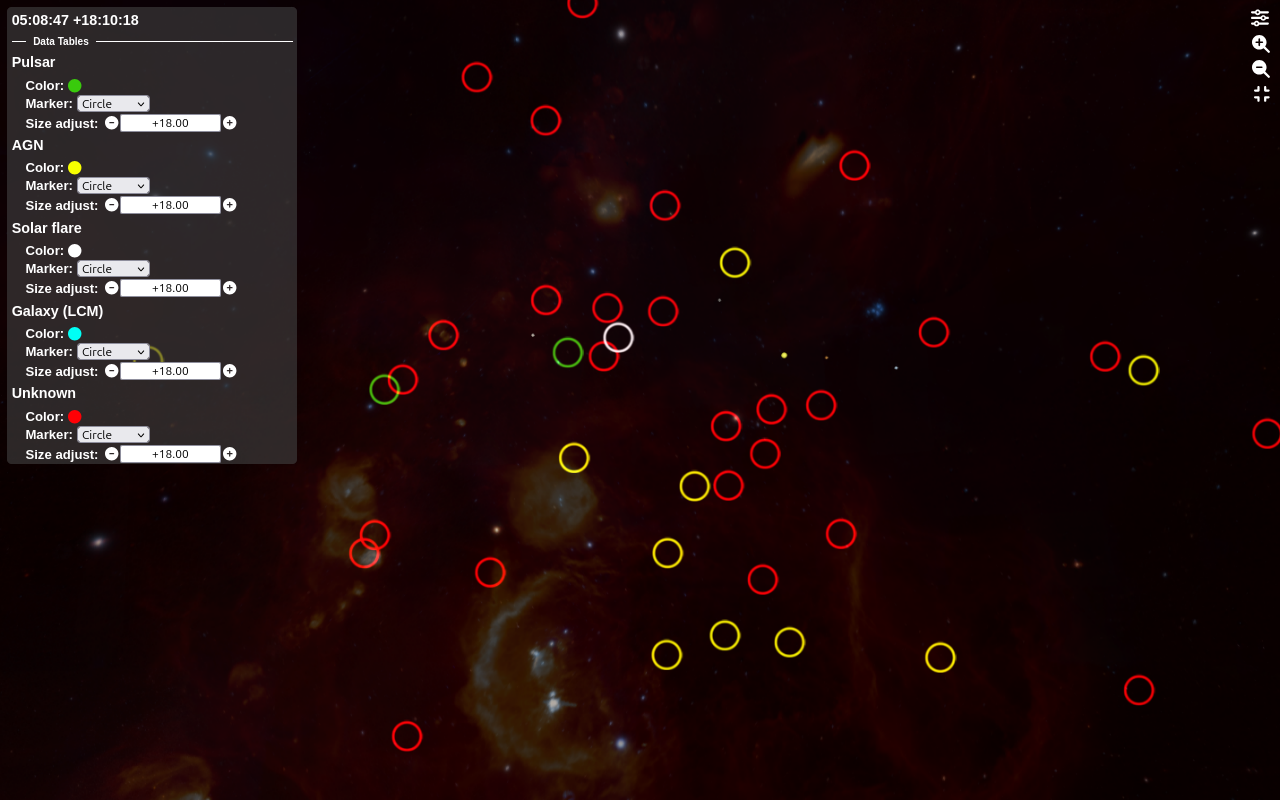

In [19]:
Image(filename='EGRETtypesources.png')

# BATSE

In this section, we will work with the sources detected by the BATSE instrument. In this case, all the sources are GRBs (Gamma-Ray Bursts).

GRBs can be classified into two types: short-duration and long-duration. Short-duration GRBs last approximately less than two seconds and are caused by the collision of very massive and dense objects, such as black holes and neutron stars. On the other hand, long-duration GRBs last approximately more than 2 seconds and are caused by supernova explosions.

GRBs do not originate from the Milky Way, but it is believed they come from very distant galaxies. It is also worth mentioning that these events are unpredictable by nature, which can make their detection challenging.

## Loading the catalog

Just like we did for the EGRET instrument, we use Vizier to search for catalogs related to BATSE this time.

In [20]:
vizier = Vizier()
catalog_list = vizier.find_catalogs('batse')
for k, v in catalog_list.items():
    print(k, ":", v.description)

IX/20A : The Fourth BATSE Burst Revised Catalog (Paciesas+ 1999)


We take the only element in the catalog with BATSE information

In [21]:
vizier.ROW_LIMIT = -1
batse_ = vizier.get_catalogs("IX/20A")
batse_

TableList with 6 tables:
	'0:IX/20A/batse' with 8 column(s) and 2704 row(s) 
	'1:IX/20A/4brcom' with 3 column(s) and 3061 row(s) 
	'2:IX/20A/duration' with 7 column(s) and 2041 row(s) 
	'3:IX/20A/flux' with 7 column(s) and 2135 row(s) 
	'4:IX/20A/maxmin' with 7 column(s) and 1323 row(s) 
	'5:IX/20A/ulysses' with 5 column(s) and 147 row(s) 

## Data processing

We work with the first of the tables. We use pandas to convert the table into this format and work with it accordingly.

In [22]:
df_batse = batse_[0].to_pandas()
df_batse

TrigNo          4B Uflag         JD       Time     RAJ2000    DEJ2000  \
0        105   4B 910421        2448367.5  33243.756  270.679993  24.760000   
1        107   4B 910423        2448369.5  71684.716  193.470001  -8.380000   
2        108   4B 910424        2448370.5  71006.572  201.309998 -45.410000   
3        109   4B 910425        2448371.5   2265.707   91.290001 -22.770000   
4        110  4B 910425B        2448371.5  20253.291  335.940002  25.770000   
...      ...         ...   ...        ...        ...         ...        ...   
2699    8112  GRB 000520        2480536.3    234.740  234.740005  -0.310000   
2700    8113  GRB 000521        2475266.3      5.960    5.960000  -6.250000   
2701    8116  GRB 000524        2440546.0    109.190  109.190002 -41.360001   
2702    8120  GRB 000525        2477454.2    280.220  280.220001 -39.439999   
2703    8121  GRB 000526        2476094.2    231.290  231.289993 -10.320000   

            GLON  
0      50.750000  
1     303.970001  
2     309.130005  
3     228.990005  
4      85.830002  
...          ...  
2699    5.640000  
2700  104.250000  
2701  252.929993  
2702  355.920013  
2703  353.049988  

[2704 rows x 8 columns]

At [this link](https://cdsarc.cds.unistra.fr/viz-bin/cat/IX/20A), we can see the information about the table we are working with. Additionally, using ".columns" we get the column headers.

In [23]:
df_batse.columns

Index(['TrigNo', '4B', 'Uflag', 'JD', 'Time', 'RAJ2000', 'DEJ2000', 'GLON'], dtype='object')

We use SkyCoord to convert the RA and DEC coordinates from the J2000 cordinate system to coordinates in the ICRS (International Celestial Reference System).

In [24]:
df_batseCoords = SkyCoord(
    df_batse['RAJ2000'], df_batse['DEJ2000'],
    unit=(u.degree, u.degree), frame='icrs'
)

# Visualization of the Mollweide Projection

## Representation of the sources

/tmp/ipykernel_4135/1387208748.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=1)


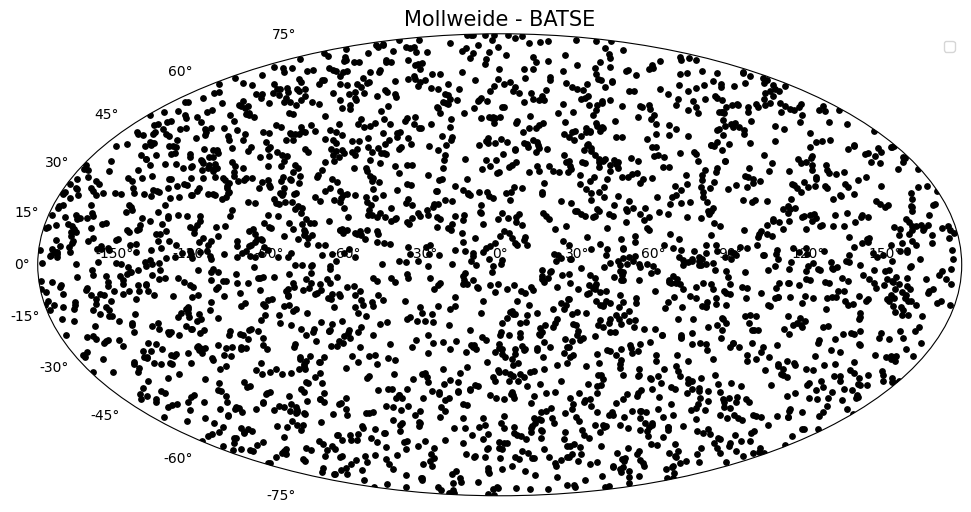

In [25]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111, projection="mollweide")
plt.title("Mollweide - BATSE", fontsize=15)
ax.scatter(-df_batseCoords.galactic.l.wrap_at(180.*u.degree).radian,
           df_batseCoords.galactic.b.radian, c="black", marker='o', s=15)
plt.grid(False)
ax.legend(loc=1)

Now we are working with 'Time', which is a measure of when events ocurred. In this way, by using a color bar, we will be able to see the chronology in which the events have taken place.

In [26]:
df_batseTime = df_batse['Time']
df_batseTime

0       33243.756
1       71684.716
2       71006.572
3        2265.707
4       20253.291
          ...    
2699      234.740
2700        5.960
2701      109.190
2702      280.220
2703      231.290
Name: Time, Length: 2704, dtype: float64

/tmp/ipykernel_4135/45147360.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=1)


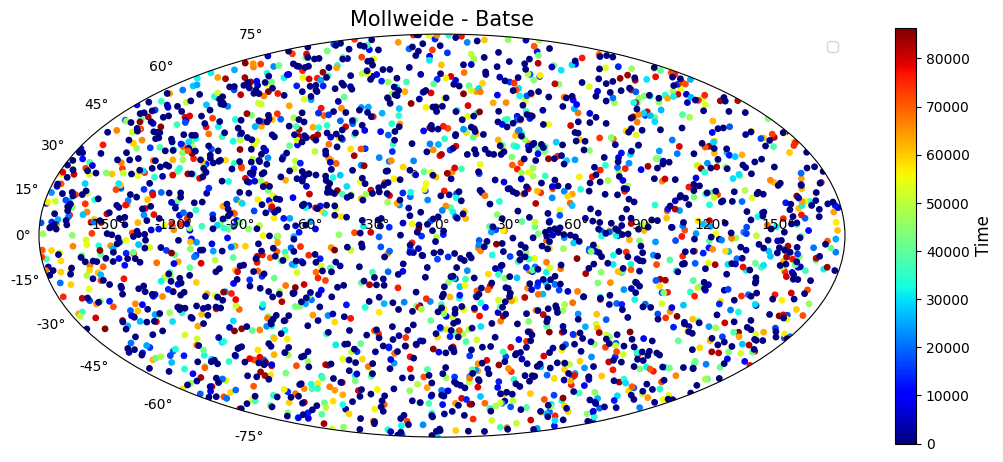

In [27]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111, projection="mollweide")
plt.title("Mollweide - Batse", fontsize=15)
ec = ax.scatter(-df_batseCoords.galactic.l.wrap_at(180.*u.degree).radian,
           df_batseCoords.galactic.b.radian, c=df_batseTime, marker='o', s=15, cmap='jet')

cbar = plt.colorbar(ec, shrink=0.9)
cbar.set_label('Time', fontsize=12)
plt.grid(False)
ax.legend(loc=1)

/tmp/ipykernel_4135/660469693.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=1)


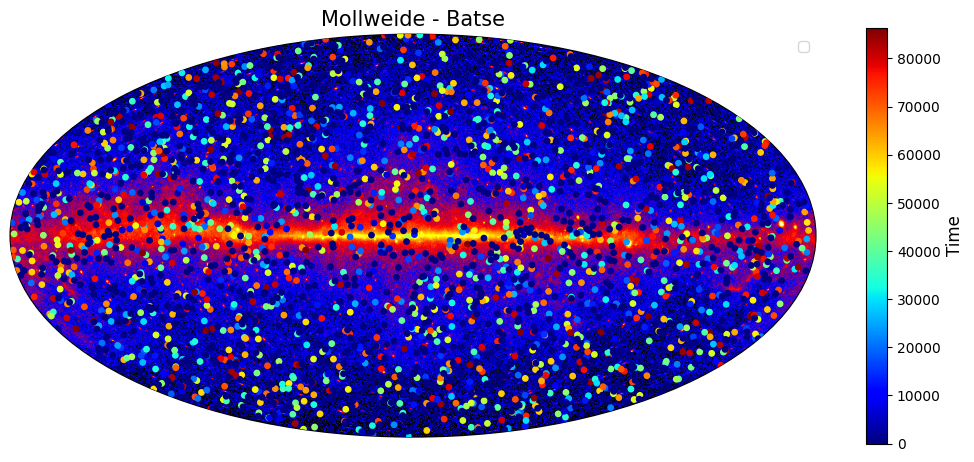

In [28]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111, projection="mollweide")
plt.title("Mollweide - Batse", fontsize=15)
ec = ax.scatter(-df_batseCoords.galactic.l.wrap_at(180.*u.degree).radian,
           df_batseCoords.galactic.b.radian, c=df_batseTime, marker='o', s=15, cmap='jet', zorder=100)

mw1 = MWSkyMap(projection="mollweide", background="gamma")
mw1.transform(ax)

cbar = plt.colorbar(ec, shrink=0.9)
cbar.set_label('Time', fontsize=12)
plt.grid(False)
ax.legend(loc=1)

Now we are going to perform a cross-match between two tables. We will work with the table we've been using and the flux table. The goal is to perform a [merge](https://pandas.pydata.org/docs/user_guide/merging.html) between the two tables, so that we keep only the GRBs that are common to both.


Let's convert the tables to pandas format so we can work with it, and then we can perform the merge between the mentioned tables using pandas format.

In [29]:
df_batse_flux = batse_[3].to_pandas()
df_batse_flux

TrigNo            F1          e_F1            F2          e_F2  \
0        105  8.685000e-07  1.089000e-08  1.321000e-06  1.437000e-08   
1        107  5.503000e-08  9.823000e-09  5.692000e-08  1.032000e-08   
2        108  8.286000e-09  6.060000e-09  1.495000e-08  5.220000e-09   
3        109  4.425000e-06  3.965000e-08  7.308000e-06  4.952000e-08   
4        110  4.503000e-07  3.662000e-08  4.673000e-07  4.065000e-08   
...      ...           ...           ...           ...           ...   
2130    8111  9.579001e-07  2.569000e-08  9.866000e-07  1.931000e-08   
2131    8112  1.295000e-07  1.735000e-08  1.496000e-07  1.429000e-08   
2132    8116  9.395000e-07  3.259000e-08  1.706000e-06  3.376000e-08   
2133    8120  3.056000e-08  5.046000e-09  5.819000e-08  5.329000e-09   
2134    8121  1.865000e-06  4.154000e-08  1.394000e-06  2.748000e-08   

                F3          e_F3  
0     2.047000e-06  1.793000e-07  
1     5.924000e-08  2.003000e-08  
2     3.199000e-08  1.236000e-08  
3     1.765000e-05  1.210000e-07  
4     1.777000e-06  1.401000e-07  
...            ...           ...  
2130  3.011000e-06  5.893000e-08  
2131  3.031000e-07  3.586000e-08  
2132  5.341000e-06  9.228000e-08  
2133  4.285000e-07  1.552000e-08  
2134  1.836000e-06  6.028000e-08  

[2135 rows x 7 columns]

In [30]:
df_merge = pd.merge(df_batse, df_batse_flux, on="TrigNo")
df_merge

TrigNo          4B Uflag         JD       Time     RAJ2000    DEJ2000  \
0        105   4B 910421        2448367.5  33243.756  270.679993  24.760000   
1        107   4B 910423        2448369.5  71684.716  193.470001  -8.380000   
2        108   4B 910424        2448370.5  71006.572  201.309998 -45.410000   
3        109   4B 910425        2448371.5   2265.707   91.290001 -22.770000   
4        110  4B 910425B        2448371.5  20253.291  335.940002  25.770000   
...      ...         ...   ...        ...        ...         ...        ...   
2130    8111  GRB 000519        2469888.2    346.030  346.029999   3.330000   
2131    8112  GRB 000520        2480536.3    234.740  234.740005  -0.310000   
2132    8116  GRB 000524        2440546.0    109.190  109.190002 -41.360001   
2133    8120  GRB 000525        2477454.2    280.220  280.220001 -39.439999   
2134    8121  GRB 000526        2476094.2    231.290  231.289993 -10.320000   

            GLON            F1          e_F1            F2          e_F2  \
0      50.750000  8.685000e-07  1.089000e-08  1.321000e-06  1.437000e-08   
1     303.970001  5.503000e-08  9.823000e-09  5.692000e-08  1.032000e-08   
2     309.130005  8.286000e-09  6.060000e-09  1.495000e-08  5.220000e-09   
3     228.990005  4.425000e-06  3.965000e-08  7.308000e-06  4.952000e-08   
4      85.830002  4.503000e-07  3.662000e-08  4.673000e-07  4.065000e-08   
...          ...           ...           ...           ...           ...   
2130   78.400002  9.579001e-07  2.569000e-08  9.866000e-07  1.931000e-08   
2131    5.640000  1.295000e-07  1.735000e-08  1.496000e-07  1.429000e-08   
2132  252.929993  9.395000e-07  3.259000e-08  1.706000e-06  3.376000e-08   
2133  355.920013  3.056000e-08  5.046000e-09  5.819000e-08  5.329000e-09   
2134  353.049988  1.865000e-06  4.154000e-08  1.394000e-06  2.748000e-08   

                F3          e_F3  
0     2.047000e-06  1.793000e-07  
1     5.924000e-08  2.003000e-08  
2     3.199000e-08  1.236000e-08  
3     1.765000e-05  1.210000e-07  
4     1.777000e-06  1.401000e-07  
...            ...           ...  
2130  3.011000e-06  5.893000e-08  
2131  3.031000e-07  3.586000e-08  
2132  5.341000e-06  9.228000e-08  
2133  4.285000e-07  1.552000e-08  
2134  1.836000e-06  6.028000e-08  

[2135 rows x 14 columns]

We are going to create maps for each of the channels. We will be working with three channels. For more information about the channels, [click here](https://ar5iv.labs.arxiv.org/html/astro-ph/9903205); it also be seen [here](https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=IX/20A/flux). We can think of the channels as energy filters, and they cover the following energy ranges:

    - Channel 1: 25 - 50 keV
    - Channel 2: 50 - 100 keV
    - Channel 3: 100 - 300 keV

In [31]:
df_batseMapsCoords = SkyCoord(df_merge['RAJ2000'], df_merge['DEJ2000'],
                          unit=(u.degree, u.degree), frame='icrs')

In [32]:
df_f1 = df_merge['F1']
df_f2 = df_merge['F2']
df_f3 = df_merge['F3']

We display the three maps, each associated with a different channel. We create a 1x3 plot that includes the maps from all three channels.

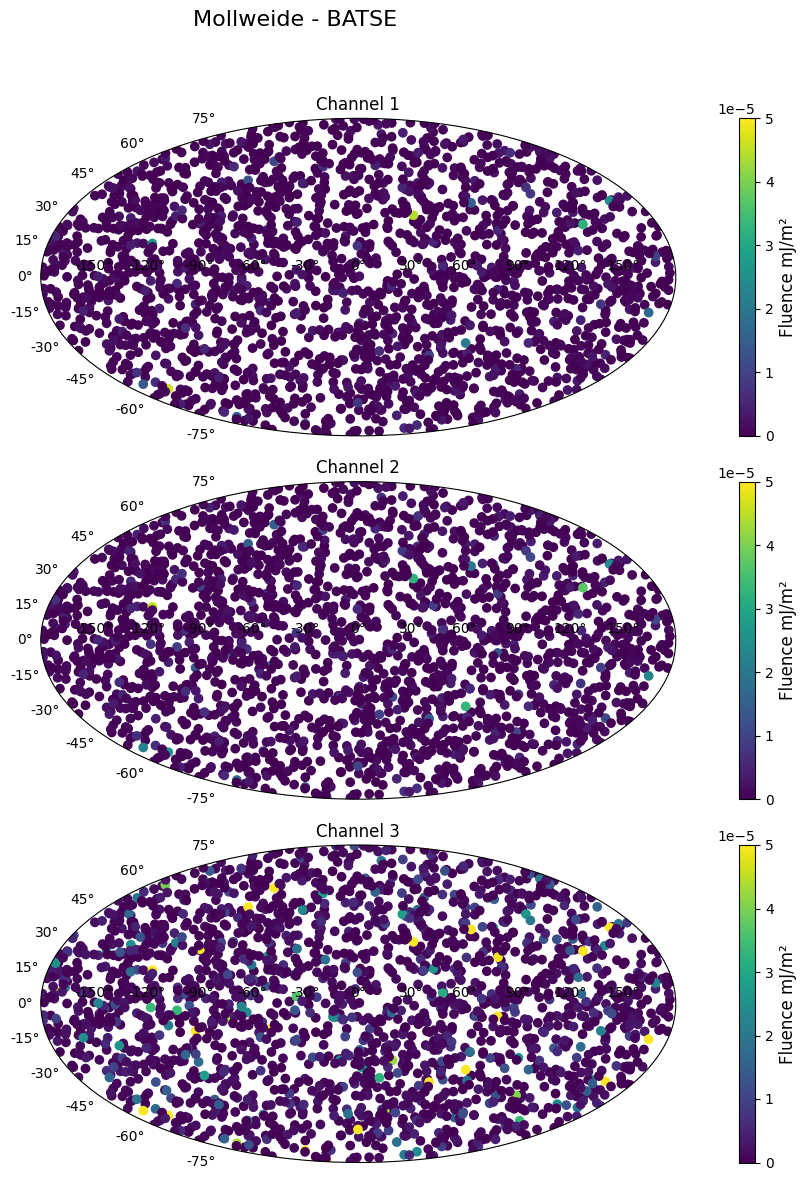

In [33]:
fig = plt.figure(figsize=(13, 12))

ax1 = fig.add_subplot(3, 1, 1, projection='mollweide')
ax2 = fig.add_subplot(3, 1, 2, projection='mollweide')
ax3 = fig.add_subplot(3, 1, 3, projection='mollweide')

fig.suptitle('Mollweide - BATSE', fontsize=16)

ax1.set_title("Channel 1")
ec1 = ax1.scatter(
    -df_batseMapsCoords.galactic.l.wrap_at(180.*u.degree).radian,
    df_batseMapsCoords.galactic.b.radian,
    c=df_f1,
    marker='o',
    cmap='viridis',
    label='pepi',
    vmin=0,
    vmax=5*10**(-5)
)

cbar1 = fig.colorbar(ec1, ax=ax1, pad=0.05)
cbar1.set_label('Fluence mJ/m²', fontsize=12)

ax2.set_title("Channel 2")
ec2 = ax2.scatter(
    -df_batseMapsCoords.galactic.l.wrap_at(180.*u.degree).radian,
    df_batseMapsCoords.galactic.b.radian,
    c=df_f2,
    marker='o',
    cmap='viridis',
    vmin=0,
    vmax=5*10**(-5)
)

cbar2 = fig.colorbar(ec2, ax=ax2, pad=0.05)
cbar2.set_label('Fluence mJ/m²', fontsize=12)

ax3.set_title("Channel 3")
ec3 = ax3.scatter(
    -df_batseMapsCoords.galactic.l.wrap_at(180.*u.degree).radian,
    df_batseMapsCoords.galactic.b.radian,
    c=df_f3,
    marker='o',
    cmap='viridis',
    vmin=0,
    vmax=5*10**(-5)
)

cbar3 = fig.colorbar(ec3, ax=ax3, pad=0.05)
cbar3.set_label('Fluence mJ/m²', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

As we can see, the color of the points represents the fluence, that is, the energy per unit area. If a point appears more yellow than blue in one channel but not in the others, this indicates that the event was more energetic in that specific energy range.

Due to this, we can observe that in channel 3 there are more energetic events compared to the other channels, as we see a greater number of yellow points.

# WorldWide Telescope - BATSE

In [34]:
wwt = await connect_to_app().becomes_ready()

In [35]:
wwt.layer_controls

In [36]:
egret_layer = wwt.layers.add_table_layer(table=batse_[0], frame='Sky',
                                         lon_att='RAJ2000', lat_att='DEJ2000')

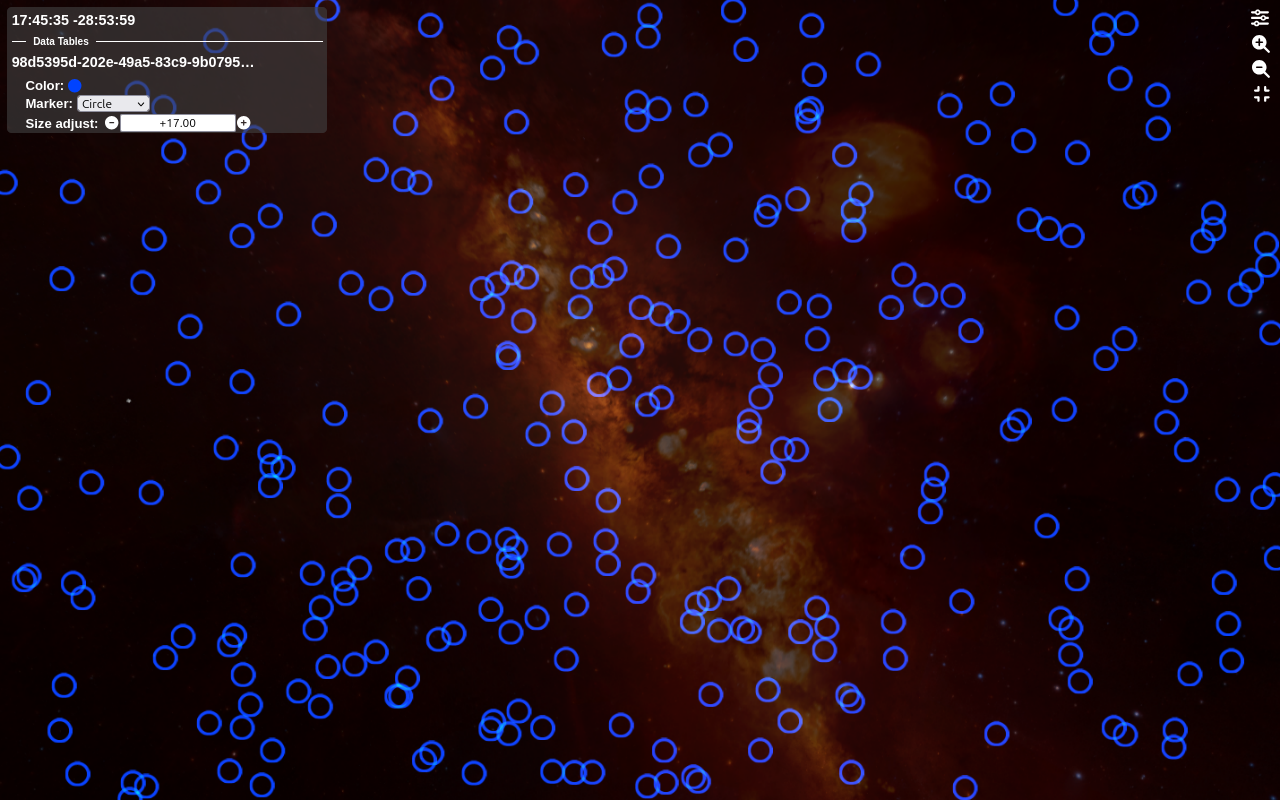

In [37]:
Image(filename='BATSEsources.png')

Finally we use WorldWide Telescope to display both the EGRET and BATSE sources.

In [38]:
egret = wwt.layers.add_table_layer(table=egret_[0], frame='Sky',
                                    lon_att='RAJ2000', lat_att='DEJ2000')

batse = wwt.layers.add_table_layer(table=batse_[0], frame='Sky',
                                    lon_att='RAJ2000', lat_att='DEJ2000')

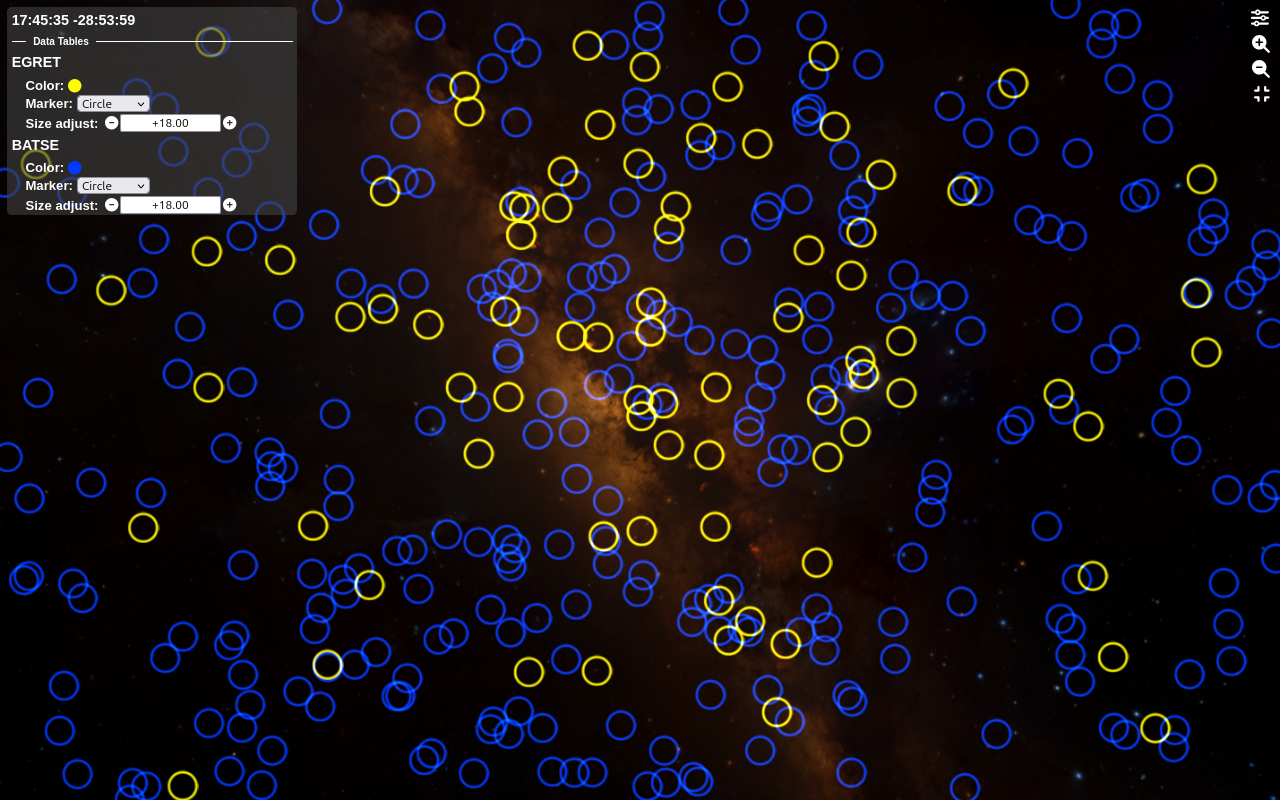

In [39]:
Image(filename='EGRETBATSEsources.png')

# Conclusions

In this exercise, we worked with the VizieR service, which allows convenient access to and handling of astronomical catalogs. The extracted data was processed using pandas library, enabling efficient manipulation and analysis for scientific visualization, particularly through the Mollweide projection.

We focused on two different catalogs: one associated with the EGRET instrument and another with the BATSE instrument.

In the EGRET case, we used the Mollweide projection to display the different types of gamma-ray sources, distinguishing them by type.

In the BATSE case, where all events are gamma-ray bursts (GRBs), we represented them using a color scale to indicate the chronology of the events.

Additionally, we used WorldWide Telescope (WWT) as an interactive tool for astronomical visualization. This allowed us to place and display the sources directly on the sky, which is particularly useful for comparing the spatial distribution of different sources types and exploring possible correlations with known structures such as the galactic plane.